## Calculate Time to Fully Balance a Pack
Criteria:
* Previous resistance: 15 Ohms
* New resistance (inernal to IC): 39 Ohms

Tasks:
* Determine time required to balance cells
* Set a maximum voltage difference for cell balancing to occur
* Test this difference at different max/min voltages to observe differences (with low voltage balancing for instance)

Criteria:
* Balancing maximum voltage range: 0.4 V (we shouldn't see greater than this)
* Balancing typical voltage range: 0.2-0.3 V
* If the balancing process takes longer than **5 hours**, we decide that it is insufficient.
* Compare this with the 15 Ohm resistance for reference
* Look at heat dissipated from resistors for interest

Evaluation range:
* Max voltages: 2.9 - 4.2 V
* Voltage ranges: 0.2 - 0.4 V

Analytical Process:
* Iterative:
    * PRIOR: set the voltage, time --> evaluate the capacity from curves
    * evaluate the current
    * calculte the capacity loss
    * search for the next voltage
    * increment the time

Required data:
* Molicel P28A Capacity vs Voltage Curves during discharge
* Lowest C-Rate plot only (because C-rate is less than 0.5 continuously)

In [48]:
# Upload data from Molicel
import pandas as pd
import numpy as np
import pickle

curve_data = pd.read_csv("Discharge_0.5C.csv")

curve_data.loc[:,'SoC'] / 100 * 2.8 * 5

0       13.903460
1       13.897042
2       13.894903
3       13.892765
4       13.890625
          ...    
3256    -0.360654
3257    -0.362794
3258    -0.364934
3259    -0.367073
3260    -0.377766
Name: SoC, Length: 3261, dtype: float64

In [49]:
# Simple typical max current calculation:
IC_resistance = 39  # Ohms
Ex_resistance = 15  # Ohms

IC_max_current = 4.2 / 39
Ex_resistance = 4.2 / 15

max_capacity = 2.8 * 5
C_rate = IC_max_current / max_capacity
C_rate

# Parameter combinations
dt = 1    # seconds
secsToHours = 1/3600    
min = 3.5
max = 4.2
max_voltage = np.arange(min, max, 0.1)
Vrange = 0.4

# Initialize dictionary to save data
keyList = []
for key in max_voltage:
    keyList.append(str(round(key, 1)))

# Nested Dict
storeDict = {}
for label in keyList:
    storeDict = {**storeDict, label: {"Time": [], "Voltage": [], "Current": [], "SoC": [], "Capacity": []}}

for j in range(0, len(max_voltage)):
    # Loop to analyze multiple parameter combinations:
    print("pass")
    # Clear maxV
    maxV = round(max_voltage[j], 1)

    # Initialize parameters
    time = []
    voltage = []
    capacity = []
    SoC = []
    current = []
    i = 0

    # Search for initial capacity
    index = np.searchsorted(-curve_data.loc[:,'Voltage'], -maxV)
    cap0 = max_capacity * curve_data.loc[curve_data.index[index],'SoC'] / 100

    # Initial parameters
    time.append(dt)
    voltage.append(maxV)
    capacity.append(cap0)
    SoC.append(cap0 / max_capacity * 100)
    thisVMin = maxV

    # Start loop
    while thisVMin > (maxV - Vrange):
        # Determine current:
        current.append(voltage[i] / IC_resistance)

        # Capacity loss (Ah)
        cap_loss = current[i] * dt * secsToHours

        # Next capacity
        capacity.append(capacity[i] - cap_loss)
        SoC.append(capacity[i+1] / max_capacity * 100)

        # Search for next voltage
        index = np.searchsorted(-curve_data.loc[:,'SoC'], -SoC[i+1])
        voltage.append(curve_data.loc[curve_data.index[index], 'Voltage'])

        # Increment time
        time.append(time[i] + dt)

        # Set Min Voltage
        thisVMin = voltage[i+1]

        # increment variable
        i = i + 1

    # Save data to nicer format
    storeDict[str(maxV)]["Time"] = time
    storeDict[str(maxV)]["Current"] = current
    storeDict[str(maxV)]["Voltage"] = voltage
    storeDict[str(maxV)]["Capacity"] = capacity
    storeDict[str(maxV)]["SoC"] = SoC
# repeat

# Save data to Pickle file
outfile = "balancing_0.4V.pkl"
with open(outfile, "wb") as file:
    pickle.dump(storeDict, file)

pass


KeyboardInterrupt: 

Retest with 0.2V difference:

In [44]:
# Simple typical max current calculation:
IC_resistance = 39  # Ohms
Ex_resistance = 15  # Ohms

IC_max_current = 4.2 / 39
Ex_resistance = 4.2 / 15

max_capacity = 2.8 * 5
C_rate = IC_max_current / max_capacity
C_rate

# Parameter combinations
dt = 1    # seconds
secsToHours = 1/3600    
min = 3.5
max = 4.2
max_voltage = np.arange(min, max, 0.1)
Vrange = 0.2

# Initialize dictionary to save data
keyList = []
for key in max_voltage:
    keyList.append(str(round(key, 1)))

# Nested Dict
storeDict = {}
for label in keyList:
    storeDict = {**storeDict, label: {"Time": [], "Voltage": [], "Current": [], "SoC": [], "Capacity": []}}

for j in range(0, len(max_voltage)):
    # Loop to analyze multiple parameter combinations:
    print("pass")
    # Clear maxV
    maxV = round(max_voltage[j], 1)

    # Initialize parameters
    time = []
    voltage = []
    capacity = []
    SoC = []
    current = []
    i = 0

    # Search for initial capacity
    index = np.searchsorted(-curve_data.loc[:,'Voltage'], -maxV)
    cap0 = max_capacity * curve_data.loc[curve_data.index[index],'SoC'] / 100

    # Initial parameters
    time.append(dt)
    voltage.append(maxV)
    capacity.append(cap0)
    SoC.append(cap0 / max_capacity * 100)
    thisVMin = maxV

    # Start loop
    while thisVMin > (maxV - Vrange):
        # Determine current:
        current.append(voltage[i] / IC_resistance)

        # Capacity loss (Ah)
        cap_loss = current[i] * dt * secsToHours

        # Next capacity
        capacity.append(capacity[i] - cap_loss)
        SoC.append(capacity[i+1] / max_capacity * 100)

        # Search for next voltage
        index = np.searchsorted(-curve_data.loc[:,'SoC'], -SoC[i+1])
        voltage.append(curve_data.loc[curve_data.index[index], 'Voltage'])

        # Increment time
        time.append(time[i] + dt)

        # Set Min Voltage
        thisVMin = voltage[i+1]

        # increment variable
        i = i + 1

    # Save data to nicer format
    storeDict[str(maxV)]["Time"] = time
    storeDict[str(maxV)]["Current"] = current
    storeDict[str(maxV)]["Voltage"] = voltage
    storeDict[str(maxV)]["Capacity"] = capacity
    storeDict[str(maxV)]["SoC"] = SoC
# repeat

# Save data to Pickle file
outfile = "balancing_0.2V.pkl"
with open(outfile, "wb") as file:
    pickle.dump(storeDict, file)

pass
pass
pass
pass
pass
pass
pass
pass


Redo the above calculations, but this time with an SoC range instead of a voltage range - still start at an initial voltage, but then control by a set drop in SoC

In [45]:
# Simple typical max current calculation:
IC_resistance = 39  # Ohms
Ex_resistance = 15  # Ohms

IC_max_current = 4.2 / 39
Ex_resistance = 4.2 / 15

max_capacity = 2.8 * 5
C_rate = IC_max_current / max_capacity
C_rate

# Parameter combinations
dt = 1    # seconds
secsToHours = 1/3600    
min = 3.7
max = 4.2
max_voltage = np.arange(min, max, 0.1)
SoCRange = 20       # %

# Initialize dictionary to save data
keyList = []
for key in max_voltage:
    keyList.append(str(round(key, 1)))

# Nested Dict
storeDict = {}
for label in keyList:
    storeDict = {**storeDict, label: {"Time": [], "Voltage": [], "Current": [], "SoC": [], "Capacity": []}}

for j in range(0, len(max_voltage)):
    # Loop to analyze multiple parameter combinations:
    print("pass")
    # Clear maxV
    maxV = round(max_voltage[j], 1)

    # Initialize parameters
    time = []
    voltage = []
    capacity = []
    SoC = []
    current = []
    i = 0

    # Search for initial capacity
    index = np.searchsorted(-curve_data.loc[:,'Voltage'], -maxV)
    cap0 = max_capacity * curve_data.loc[curve_data.index[index],'SoC'] / 100

    # Initial parameters
    time.append(dt)
    voltage.append(maxV)
    capacity.append(cap0)
    SoC_initial = cap0 / max_capacity * 100
    SoC.append(SoC_initial)
    deltaSoC = 0

    # Start loop
    while deltaSoC < SoCRange:
        # Determine current:
        current.append(voltage[i] / IC_resistance)

        # Capacity loss (Ah)
        cap_loss = current[i] * dt * secsToHours

        # Next capacity
        capacity.append(capacity[i] - cap_loss)
        SoC.append(capacity[i+1] / max_capacity * 100)

        # Search for next voltage
        index = np.searchsorted(-curve_data.loc[:,'SoC'], -SoC[i+1])
        if index == 3261:
            print("PAUSE")
        voltage.append(curve_data.loc[curve_data.index[index], 'Voltage'])

        # Increment time
        time.append(time[i] + dt)

        # Set SoC difference
        deltaSoC = abs(SoC_initial - SoC[i+1])

        # increment variable
        i = i + 1

    # Save data to nicer format
    storeDict[str(maxV)]["Time"] = time
    storeDict[str(maxV)]["Current"] = current
    storeDict[str(maxV)]["Voltage"] = voltage
    storeDict[str(maxV)]["Capacity"] = capacity
    storeDict[str(maxV)]["SoC"] = SoC
# repeat

# Save data to Pickle file
outfile = "balancing_20SoC.pkl"
with open(outfile, "wb") as file:
    pickle.dump(storeDict, file)

pass
pass
pass
pass
pass


Upload data and analyze it

In [47]:
# Analyze the data
import pickle

infile_04 = "balancing_0.4V.pkl"
infile_02 = "balancing_0.2V.pkl"
infile_20 = "balancing_20SoC.pkl"

with open(infile_04, "rb") as file:
    data04 = pickle.load(file)

with open(infile_02, "rb") as file:
    data02 = pickle.load(file)

with open(infile_20, "rb") as file:
    data20 = pickle.load(file)

Determine the maximum time required for each balancing cycle

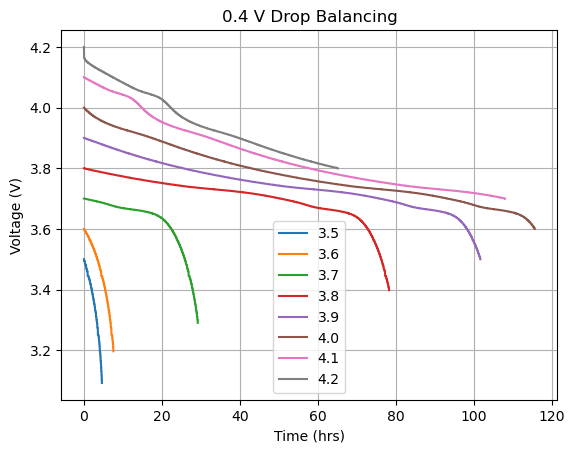

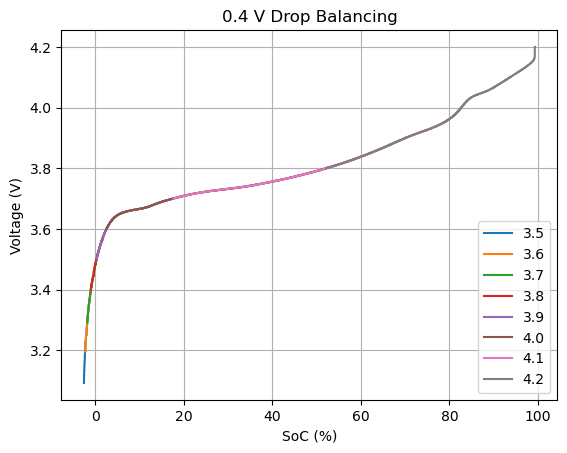

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the time vs voltage for each balancing cycle
keys04 = data04.keys()

# Plot from 0.4 V section
for key in keys04:
    time = np.array(data04[key]["Time"]) / 3600
    voltage = data04[key]["Voltage"]

    plt.plot(time, voltage, label=str(key))

plt.xlabel("Time (hrs)")
plt.ylabel("Voltage (V)")
plt.title("0.4 V Drop Balancing")
plt.grid()
plt.legend()
plt.show()

# Plot from 0.4 V section
for key in keys04:
    voltage = data04[key]["Voltage"]
    SoC = np.array(data04[key]["SoC"])

    plt.plot(SoC, voltage, label=str(key))

plt.xlabel("SoC (%)")
plt.ylabel("Voltage (V)")
plt.title("0.4 V Drop Balancing")
plt.grid()
plt.legend()
plt.show()

Re-evaluate this with the 0.2 V Drop Instead - Since the drops I calculated don't necessarily represent the change in SoC. Notice that above, the 4.0 option covered the most change in SoC, so it makes sense that it would take the longest. Now I'm wondering whether I should have organized the data in that way instead.

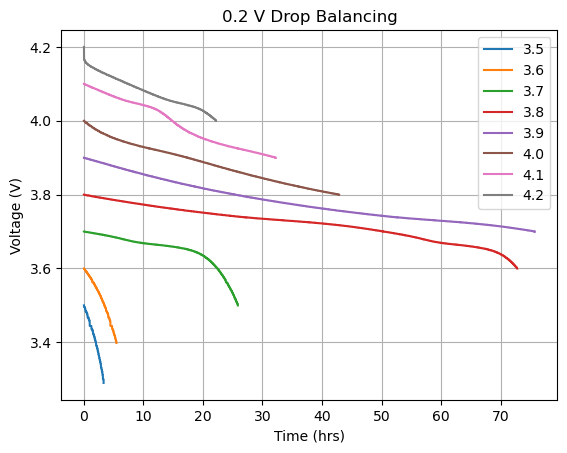

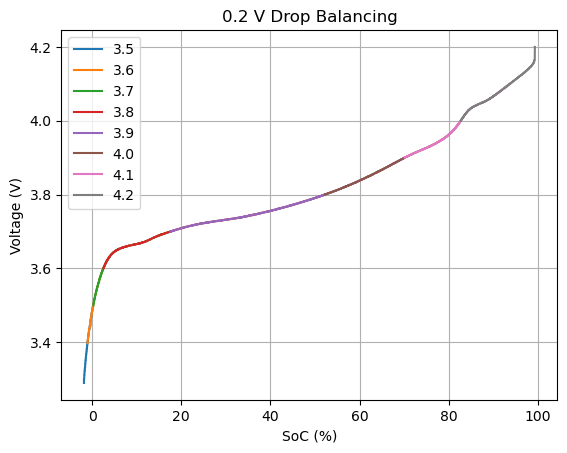

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the time vs voltage for each balancing cycle
keys02 = data02.keys()

# Plot from 0.2 V section
for key in keys02:
    time = np.array(data02[key]["Time"]) / 3600
    voltage = data02[key]["Voltage"]

    plt.plot(time, voltage, label=str(key))

plt.xlabel("Time (hrs)")
plt.ylabel("Voltage (V)")
plt.title("0.2 V Drop Balancing")
plt.grid()
plt.legend()
plt.show()

# Plot from 0.2 V section
for key in keys02:
    voltage = data02[key]["Voltage"]
    SoC = np.array(data02[key]["SoC"])

    plt.plot(SoC, voltage, label=str(key))

plt.xlabel("SoC (%)")
plt.ylabel("Voltage (V)")
plt.title("0.2 V Drop Balancing")
plt.grid()
plt.legend()
plt.show()

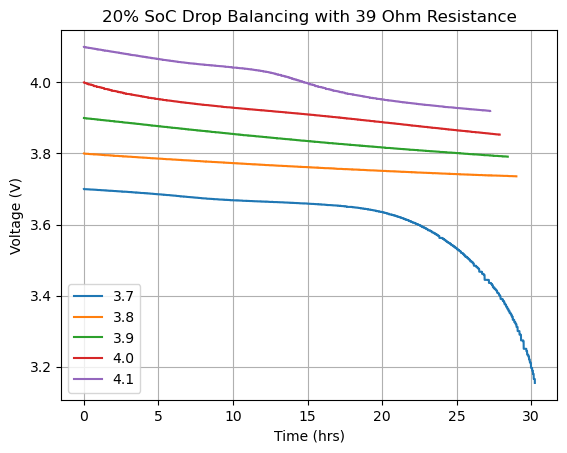

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the time vs voltage for each balancing cycle
keys20 = data20.keys()

# Plot from 0.2 V section
for key in keys20:
    time = np.array(data20[key]["Time"]) / 3600
    voltage = data20[key]["Voltage"]

    plt.plot(time, voltage, label=str(key))

plt.xlabel("Time (hrs)")
plt.ylabel("Voltage (V)")
plt.title("20% SoC Drop Balancing with 39 Ohm Resistance")
plt.grid()
plt.legend()
plt.savefig("20%_SoC_Balancing_39Ohm.png")
plt.show()

# # Plot from 0.2 V section
# for key in keys20:
#     voltage = data20[key]["Voltage"]
#     SoC = np.array(data20[key]["SoC"])

#     plt.plot(SoC, voltage, label=str(key))

# plt.xlabel("SoC (%)")
# plt.ylabel("Voltage (V)")
# plt.title("20% SoC Drop Balancing")
# plt.grid()
# plt.legend()
# plt.show()

In [59]:
# Simple typical max current calculation:
IC_resistance = 39  # Ohms
Ex_resistance = 15  # Ohms

IC_max_current = 4.2 / 39
Ex_max_current = 4.2 / 15

max_capacity = 2.8 * 5
C_rate = IC_resistance / max_capacity
C_rate

# Parameter combinations
dt = 1    # seconds
secsToHours = 1/3600    
min = 3.7
max = 4.2
max_voltage = np.arange(min, max, 0.1)
SoCRange = 20       # %

# Initialize dictionary to save data
keyList = []
for key in max_voltage:
    keyList.append(str(round(key, 1)))

# Nested Dict
storeDict = {}
for label in keyList:
    storeDict = {**storeDict, label: {"Time": [], "Voltage": [], "Current": [], "SoC": [], "Capacity": []}}

for j in range(0, len(max_voltage)):
    # Loop to analyze multiple parameter combinations:
    print("pass")
    # Clear maxV
    maxV = round(max_voltage[j], 1)

    # Initialize parameters
    time = []
    voltage = []
    capacity = []
    SoC = []
    current = []
    i = 0

    # Search for initial capacity
    index = np.searchsorted(-curve_data.loc[:,'Voltage'], -maxV)
    cap0 = max_capacity * curve_data.loc[curve_data.index[index],'SoC'] / 100

    # Initial parameters
    time.append(dt)
    voltage.append(maxV)
    capacity.append(cap0)
    SoC_initial = cap0 / max_capacity * 100
    SoC.append(SoC_initial)
    deltaSoC = 0

    # Start loop
    while deltaSoC < SoCRange:
        # Determine current:
        current.append(voltage[i] / Ex_resistance)

        # Capacity loss (Ah)
        cap_loss = current[i] * dt * secsToHours

        # Next capacity
        capacity.append(capacity[i] - cap_loss)
        SoC.append(capacity[i+1] / max_capacity * 100)

        # Search for next voltage
        index = np.searchsorted(-curve_data.loc[:,'SoC'], -SoC[i+1])
        if index == 3261:
            print("PAUSE")
        voltage.append(curve_data.loc[curve_data.index[index], 'Voltage'])

        # Increment time
        time.append(time[i] + dt)

        # Set SoC difference
        deltaSoC = abs(SoC_initial - SoC[i+1])

        # increment variable
        i = i + 1

    # Save data to nicer format
    storeDict[str(maxV)]["Time"] = time
    storeDict[str(maxV)]["Current"] = current
    storeDict[str(maxV)]["Voltage"] = voltage
    storeDict[str(maxV)]["Capacity"] = capacity
    storeDict[str(maxV)]["SoC"] = SoC
# repeat

# Save data to Pickle file
outfile = "balancing_20SoC_Ex.pkl"
with open(outfile, "wb") as file:
    pickle.dump(storeDict, file)

pass
pass
pass
pass
pass


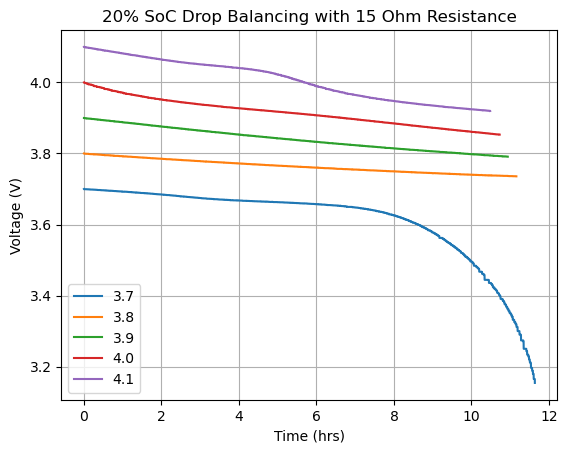

In [60]:
infile_20_Ex = "balancing_20SoC_Ex.pkl"

with open(infile_20_Ex, "rb") as file:
    data20Ex = pickle.load(file)

# Plot the time vs voltage for each balancing cycle
keys20Ex = data20Ex.keys()

# Plot from 0.2 V section
for key in keys20Ex:
    time = np.array(data20Ex[key]["Time"]) / 3600
    voltage = data20Ex[key]["Voltage"]

    plt.plot(time, voltage, label=str(key))

plt.xlabel("Time (hrs)")
plt.ylabel("Voltage (V)")
plt.title("20% SoC Drop Balancing with 15 Ohm Resistance")
plt.grid()
plt.legend()
plt.savefig("20%_SoC_Balancing_15Ohm.png")
plt.show()
